<a href="https://colab.research.google.com/github/jatinsharma16/Capstone-Project-Linear-Regression/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting the drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Defining the path of the csv file and reading the content of the file
path = "/content/drive/MyDrive/Almabetter/Modules/Machine_Learning/Regression_Capstone_project/SeoulBikeData.csv"
df = pd.read_csv(path, encoding = 'unicode_escape')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


<h3>So the above data shows that the dataset has 8760 records from 01/12/2017 to 30/11/2018

In [6]:
df.shape

(8760, 14)

<h3> There are 14 columns present in the dataset, I will define these columns below.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
df.describe().shape

(8, 10)

This shows that there are 10 numerical columns present in the dataset. Out of these 10 columns, one is the dependent variable ('Rented Bike Count') and we will be considering the "Hour" column as a categorical column.

In [10]:
#all the columns present in the dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Column Description**


*   **Date**: calendar date when the bikes were rented
*   **Rented Bike Count**: the number of bikes rented
*   **Hour**: the hour of the day 
*   **Temperature (°C)**: temperature at that hour in degree celcius
*   **Humidity (%)**: percentage of Humidity present in the air
*   **Wind speed (m/s)**: the speed of wind in metres per second
*   **Visibility (10m)**: the distance clearly visible 
*   **Dew point temperature (°C)**: 
*   **Solar Radiation(MJ/m2)**: radiation in the environment due to the sun (in MegaJoules per metre square)
*   **Rainfall (mm)**: the amount of rainfall in mm
*   **Snowfall (cm)**: the amount of snowfall in cm
*   **Seasons**: the season of the year (winter, autumn, summer, fall)
*   **Holiday**: Whether it is a holiday or not.
*   **Functioning Day**: Whether it is a functioning day or not.



In [11]:
# checking for the null values present in the dataset.
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<h3>So we can see that the dataset does not contain any null values.

In [12]:
# checking for the duplicate values present in the dataset.
df[df.duplicated()].shape

(0, 14)

There are no duplicate values either, so now we can move to the exploratary data analysis part.

<h1>So now we will start plotting some graphs so as we can get some insights from the data. We will check for the skewness of individual variables, correlation between the independend and dependent variables and outliers present in the dataset.

<h1> Handling numerical features

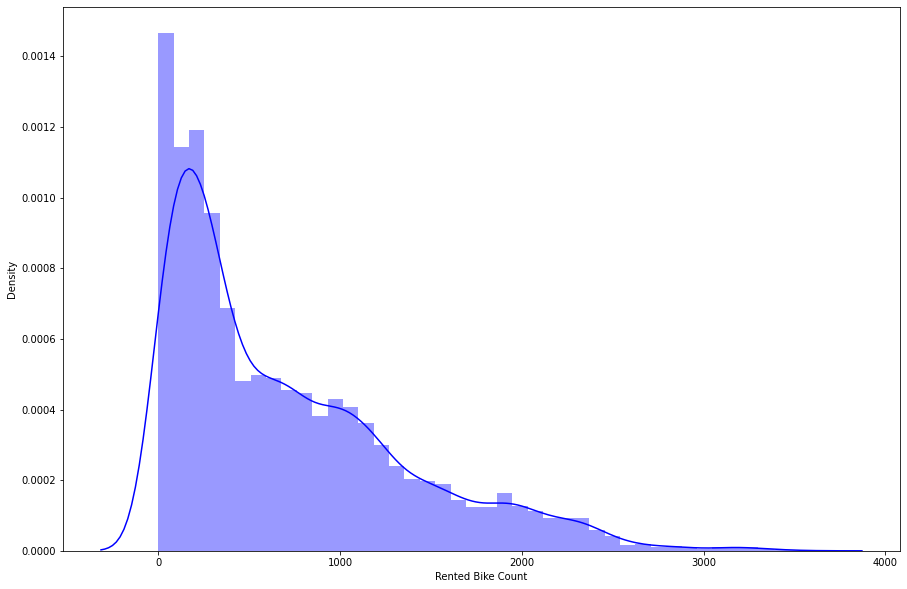

In [13]:
plt.figure(figsize=(15,10))
sns.distplot(df['Rented Bike Count'], color = 'b')
plt.show()

From the above graph, we can see that the dependent variable is right skewed and we need to apply some transformation to it so as to make it normally distributed. To remove the right skewness or the negative skewness, we can apply log transformation of the square root transformation.

In [14]:
numeric_col = df.describe().drop('Hour', axis=1).columns
# dropping the hour column as it is a categorical column and not a numerical column.

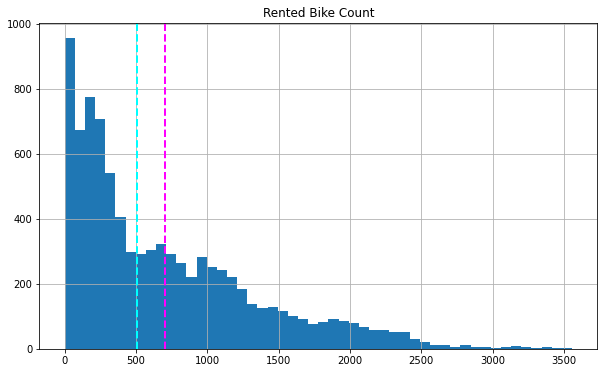

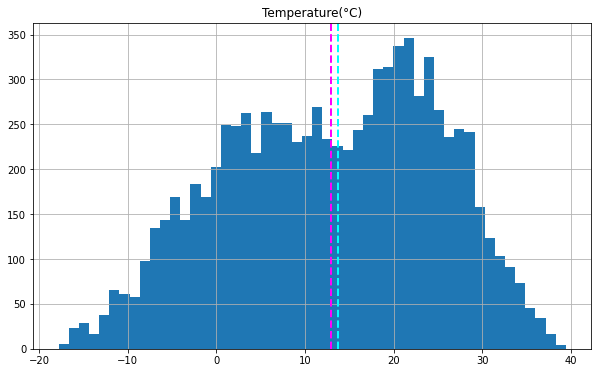

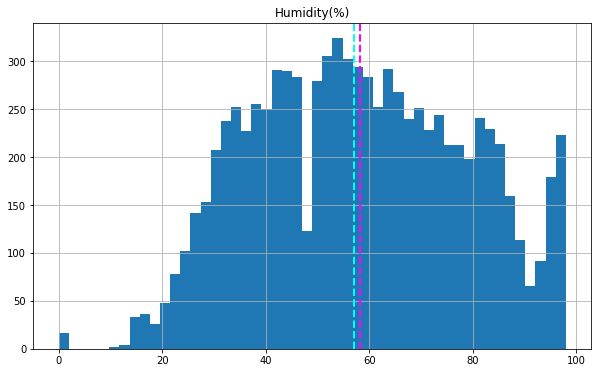

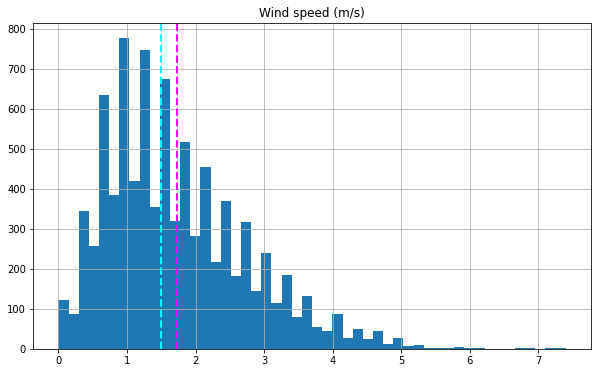

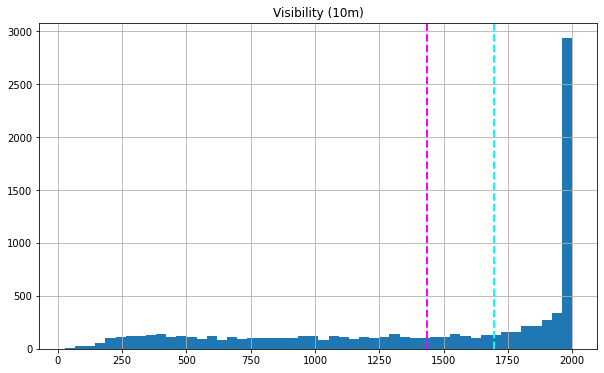

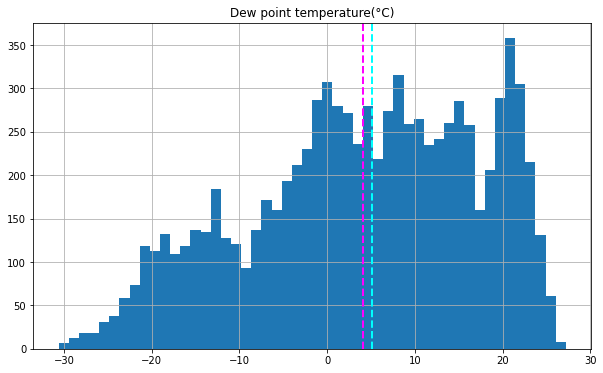

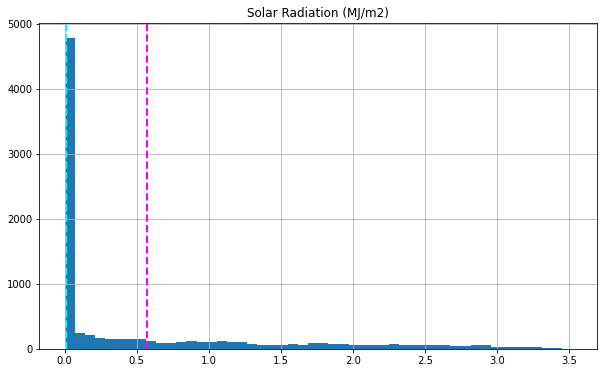

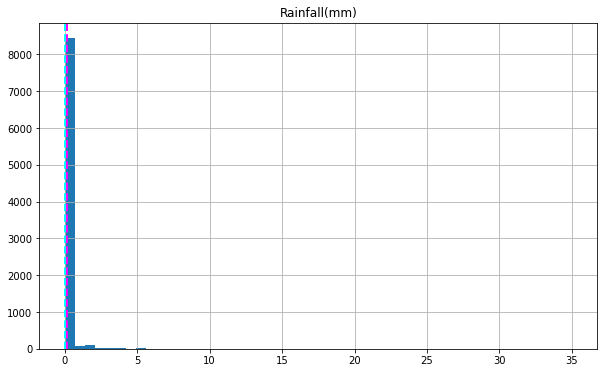

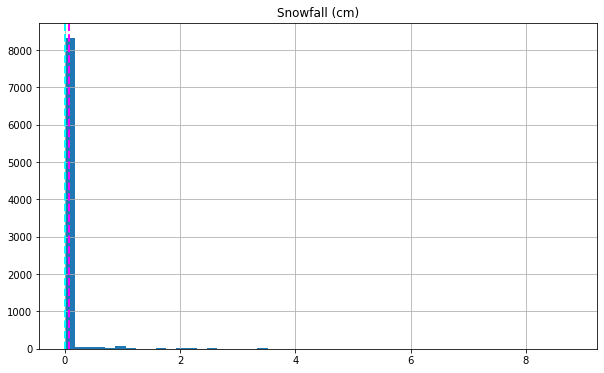

In [15]:
# plotting all the numerical columns to check whether the columns are skewed or normally distributed

for col in numeric_col:
  fig = plt.figure(figsize = (10, 6))
  ax = fig.gca()
  variable = df[col]
  variable.hist(bins=50, ax = ax)
  ax.axvline(variable.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(variable.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Since, we can see a lot of skewness in the above numerical columns therefore we will apply some transformation over the columns and plot the values again to check whether the skewness is still there or not. As we can see that our columns contains negative values also therefore we can't use log transformation therefore using some other transformation techniques like cube root transformation.

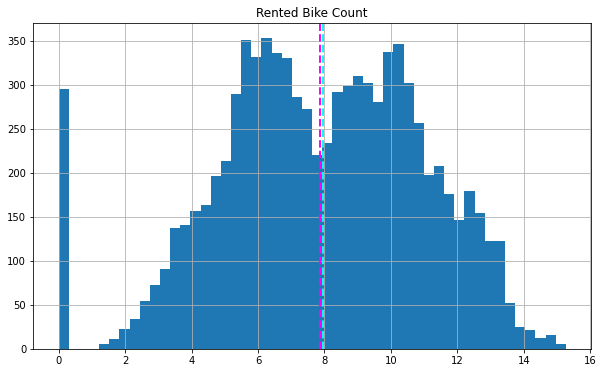

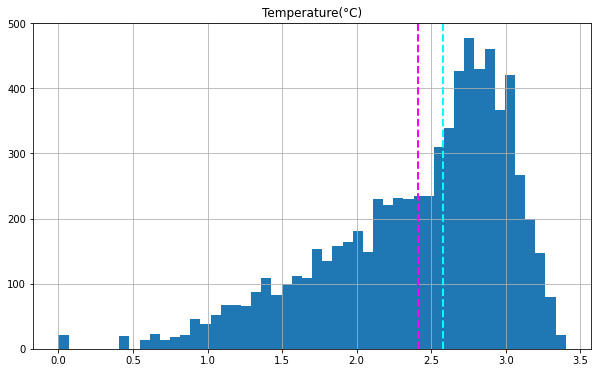

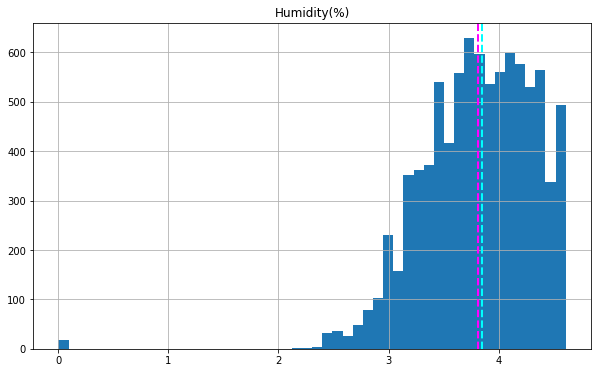

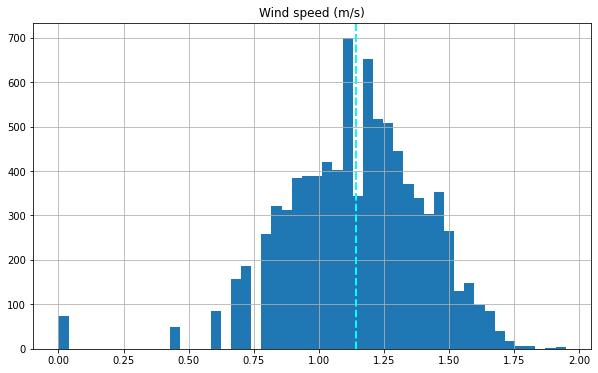

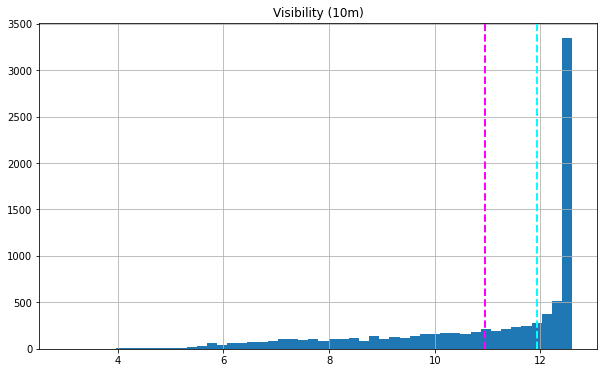

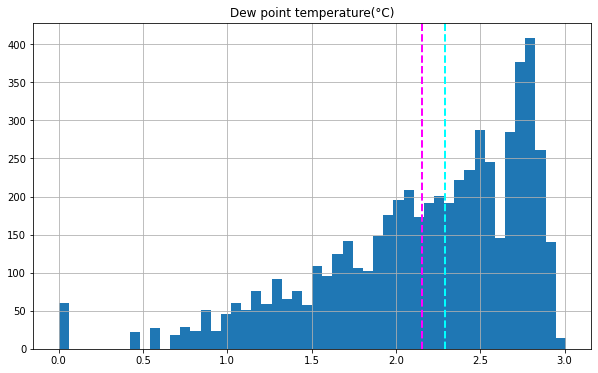

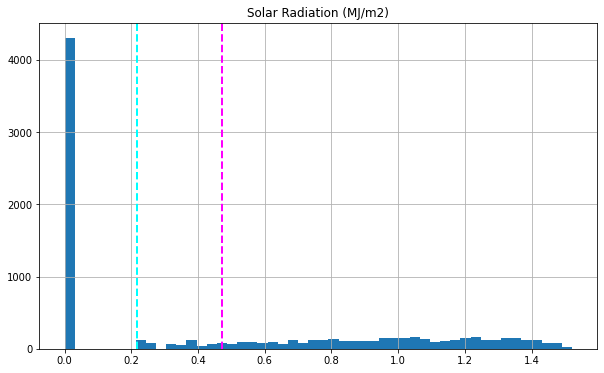

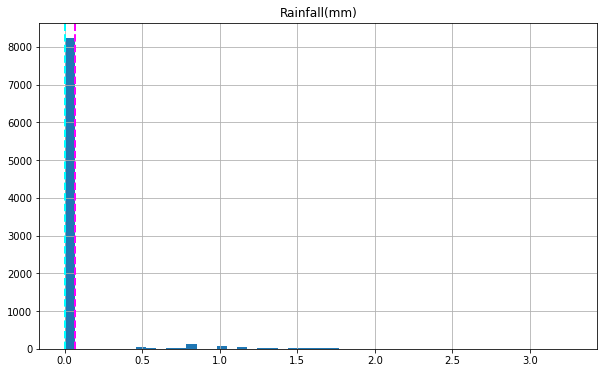

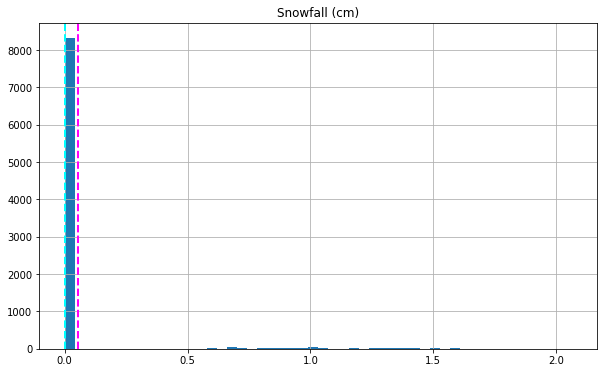

In [16]:
# Plotting the numerical variables by applying cube root transformation over the column values.

for col in numeric_col:
  fig = plt.figure(figsize = (10, 6))
  ax = fig.gca()
  variable = df[col]**(1/3)
  variable.hist(bins=50, ax=ax)
  ax.axvline(variable.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(variable.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Taking the cube root is making the columns more skewed towards the other side therefore we will just take the cube root of the dependent variable and we will be using the independent columns as they are.

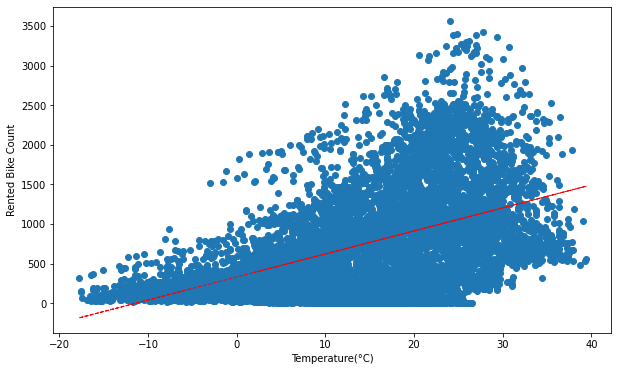

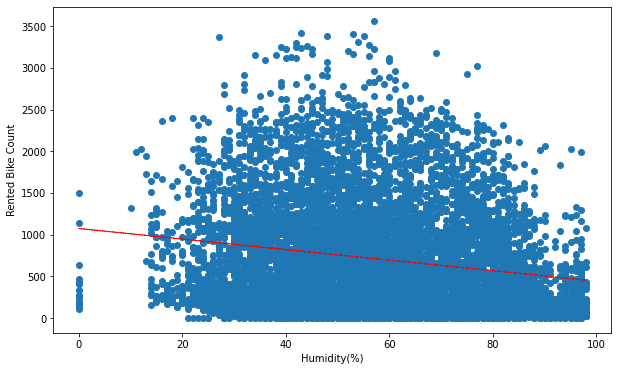

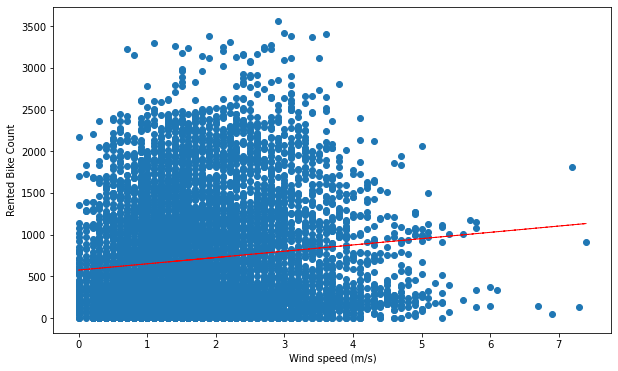

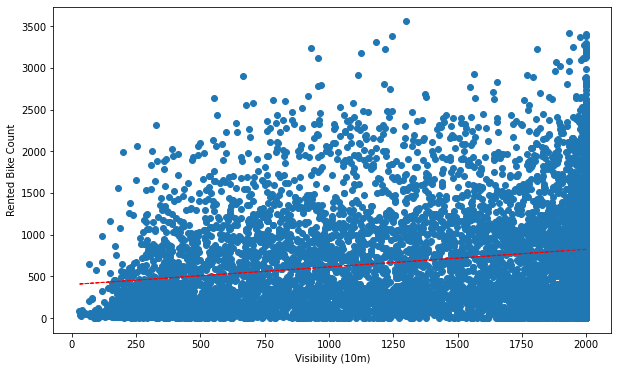

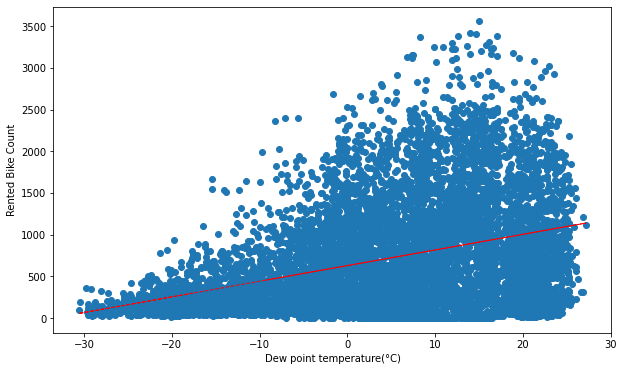

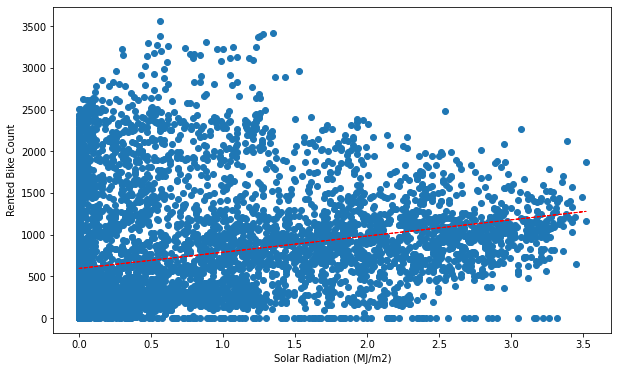

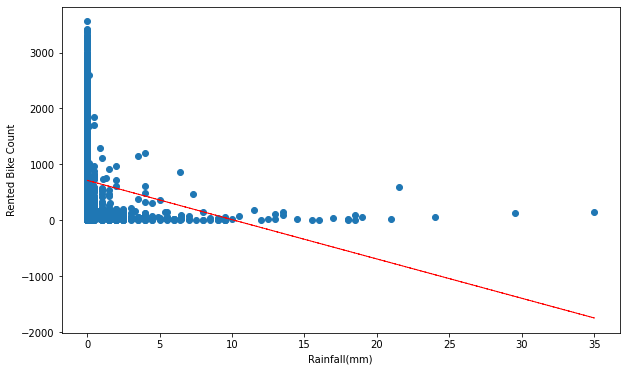

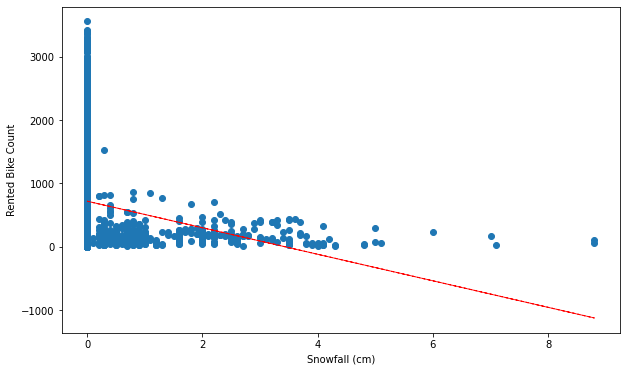

In [17]:
# Plotting the scatter plot between the numerical columns and dependent column

for col in numeric_col[1:]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')

    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Most of the columns are showing positive linear relation with the dependent variable but there are some variables like rainfall and snowfall which are showing negative correlation with the dependent variable.

To check correlation of all the numeric variables, we will plot a correlation heat map.

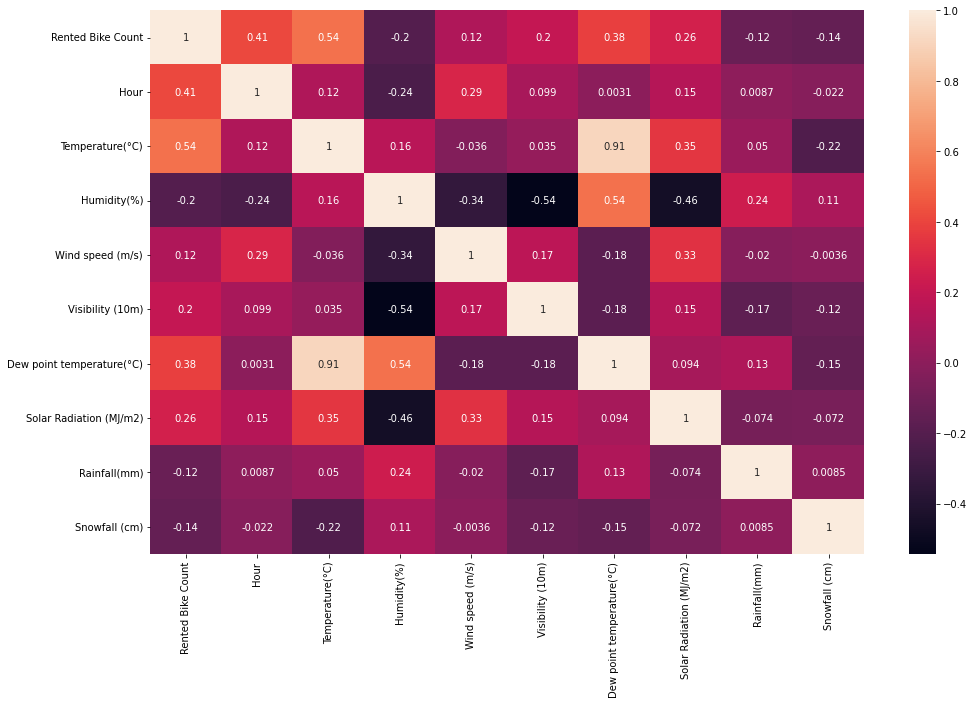

In [18]:
# Correlation heat map

plt.figure(figsize = (16, 10))
correlation = df.corr()
sns.heatmap(correlation, annot= True)

In [19]:
# Removing multicollinearity from the data using the VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

def calc_vif(temp):
  vif = pd.DataFrame()
  vif["Variable"] = temp.columns
  vif["VIF"] = [VIF(temp.values, i) for i in range(temp.shape[1])]

  return vif

In [20]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Hour']]])

,Variable,VIF
0,Temperature(°C),29.075866
1,Humidity(%),5.069743
2,Wind speed (m/s),4.517664
3,Visibility (10m),9.051931
4,Dew point temperature(°C),15.201989
5,Solar Radiation (MJ/m2),2.821604
6,Rainfall(mm),1.079919
7,Snowfall (cm),1.118903


Since the Temperature and Dew point Temperature are showing huge correlation therefore we will drop Temperature and then find the VIF again.

In [21]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Hour', 'Temperature(°C)']]])

,Variable,VIF
0,Humidity(%),5.049297
1,Wind speed (m/s),4.265415
2,Visibility (10m),4.623490
3,Dew point temperature(°C),1.655311
4,Solar Radiation (MJ/m2),1.901297
5,Rainfall(mm),1.079157
6,Snowfall (cm),1.111247


Now the numerical columns look good for the modeling.

key notes:


*   Transform the dependent column using the cube root transformation.
*   Drop the temperature column as it is showing huge correlation with the dew point temperature column.



<h1> Handling Categorical Features

In [22]:
# first dividing the date column into year months and day of the week column

df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df['Day'] = df['Date'].map(lambda x: x.day)
df['Month'] = df['Date'].map(lambda x: x.month)
df['Year'] = df['Date'].map(lambda x: x.year)

In [24]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [25]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018


Since we have made different columns for the day of month, month and the year, now we can drop the Date column from our dataset since it is now redundant column.

In [26]:
df.drop('Date', axis=1, inplace = True)

In [27]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [28]:
# Now we will start performing encoding over the categorical data. We will perform one-hot encoding for columns like Hour, Day, month, year and season.
# We will perform mapping for the columns like Functioning day and Holiday.

# Performing mapping on Holiday and Functioning Day columns
df['Holiday'] = df['Holiday'].map({"No Holiday": 0, "Holiday": 1})
df['Functioning Day'] = df['Functioning Day'].map({"Yes": 1, "No": 0})

In [29]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,12,1,2017


In [30]:
# One hot encoding the columns like Hour, Day, Month and Year

df = pd.get_dummies(df, columns = ['Hour', 'Day', 'Month', 'Year', 'Seasons'], drop_first = True)

In [31]:
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2018,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df.shape

(8760, 79)

Since we are done with the EDA as well as data preparation parts like feature engineering and variable encoding, therefore now we are all set to start the modelling part.

In [33]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Day_2', 'Day_3',
       'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10',
       'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17',
       'Day_18', 'Day_19', 'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24',
       'Day_25', 'Day_26', 'Day_27', 'Day_28', 'Day_29', 'Day_30', 'Day_31',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2018',
       'Seasons_Spring

<h1> Implementing the Linear Regression 

In [34]:
# dividing the data into the independent and dependent variables

X = df.drop('Rented Bike Count', axis=1)
Y = df['Rented Bike Count']**(1/3)

In [35]:
# Scaling the data
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_x = scaler.fit_transform(X)
robust_x = pd.DataFrame(robust_x, columns = X.columns)

# Before standardisation, we are using the robust scaler which uses the interquartile technique to remove the outliers.

In [36]:
# Now, standardizing the data
 
scaler = preprocessing.StandardScaler()
standard_x = scaler.fit_transform(robust_x)
standard_x = pd.DataFrame(standard_x, columns = X.columns)

In [37]:
# splitting the data into test and train 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(standard_x, Y, test_size = 0.20, random_state = 0)

In [38]:
# Impoting the Linear Regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
lr.score(x_train, y_train)

0.8048582578912737

In [41]:
# obtaining prediction over the training data
y_pred_train = lr.predict(x_train) 

In [42]:
# obtaining prediction over the test data 
y_pred_test = lr.predict(x_test)

In [43]:
# Importing the metrics to check the accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
# Checking for the Training dataset
MSE = mean_squared_error(y_train, y_pred_train)
RMSE = np.sqrt(MSE)

print('FOR TRAINING DATASET:')
print("MSE: ", MSE, '\nRMSE: ', RMSE)

FOR TRAINING DATASET:
MSE:  1.863528868620277 
RMSE:  1.3651113026490833


In [48]:
R2_score = r2_score(y_train, y_pred_train)
adj_r2_score = 1 - (1-R2_score)*(len(standard_x)- 1)/(len(standard_x) - len(standard_x.columns) - 1)

print("R2_score: ", R2_score, "\nAdjusted R2_score: ", adj_r2_score)

R2_score:  0.8048582578912737 
Adjusted R2_score:  0.8031048820262259


In [49]:
# Checking for the Test dataset
MSE = mean_squared_error(y_test, y_pred_test)
RMSE = np.sqrt(MSE)

print('FOR TESTING DATASET:')
print("MSE: ", MSE, '\nRMSE: ', RMSE)

FOR TESTING DATASET:
MSE:  1.8392054223091165 
RMSE:  1.3561730797759983


In [50]:
R2_score = r2_score(y_test, y_pred_test)
adj_r2_score = 1 - (1-R2_score)*(len(x_test)- 1)/(len(x_test) - len(standard_x.columns) - 1)

print("R2_score: ", R2_score, "\nAdjusted R2_score: ", adj_r2_score)

R2_score:  0.8148059192856346 
Adjusted R2_score:  0.8061716465446183


Although our model is giving a really good score but let us try to improve the model by using ElasticNet, which is a combination of Lasso and Ridge. We will also use the concept of GridsearchCV which will help us to improve the accuracy of our model at the time of training only.

Understandind the concepts of ElasticNet, Lasso, Ridge and GridSearchCV:



<h1>Implementing ElasticNet using GridSearchCV